<a href="https://colab.research.google.com/github/shivnandanrai/Movie_Sentiment-Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from google.colab import drive



In [101]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
import numpy as np

In [122]:
 df= pd.read_csv("/content/drive/MyDrive/archive_data/train.csv")

In [125]:
df.head(1000)

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
995,Punctuating the opening credits sequence is a ...,pos
996,I was having just about the worst day of my li...,pos
997,Expectations were somewhat high for me when I ...,neg
998,Whattt was with the sound? It sounded like it ...,neg


In [105]:
# text cleaning
#1. smaple 1000 rows
#2.Remove html tags
#3.converting every things to lower case
#4. removing  stop words
#5. stemming

In [127]:
df= df.sample(100, replace=False)

In [128]:
df.shape

(100, 2)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 3549 to 11812
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       100 non-null    object
 1   sentiment  100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [131]:
df['sentiment'].replace({'positive':1, 'negative':0},inplace=True)

<ipython-input-131-dd08e2d17e60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({'positive':1, 'negative':0},inplace=True)


In [132]:
df.head()

,text,sentiment
3549,I liked this show! I think it was nothing with...,neg
9001,Before George Clooney directed Sam Rockwell in...,pos
11149,"This movie was exactly what I expected, not gr...",neg
10677,A squashy slapstick mess posing as a comedy. E...,neg
3431,"This is a pleasant film, even if the premise i...",pos


In [134]:
import re
clean= re.compile('<.*?>')
re.sub(clean, '',df.iloc[2].text)

"This movie was exactly what I expected, not great, but also not that bad either. In my opinion PG13 movies aren't scary enough so that's why I already knew I was going to be bored throughout the entire film. Sure there were scary things going on in the hotel room, but nothing we all haven't already seen. I guess I didn't like it because I thought there were too many twists and turns happening; it got old and repetitive. I also didn't understand if all the things Cusack was experiencing in the room was real or not. There is no explanation for any of the events that occurred. The movie just drags on and when it finally does come to an end you want it to keep going because you are still waiting around for someone to tell you what the whole movie was about. What I did like was the special effects. Other than that there wasn't much enjoyment from it. Maybe its just me but I thought this was below average."

In [135]:
#funcation to clean html tags
def clean_html(text):
  clean= re.compile('<.*?>')
  return re.sub(clean, '',text)

In [136]:
df['clean_text']=df['text'].apply(clean_html)


In [137]:
#converting everything to lower
def convert_lower(text):
  return text.lower()

In [138]:
df['clean_text']=df['clean_text'].apply(convert_lower)

In [139]:
#function to remove special characters
def remove_special(text):
  x=''
  for i in text:
    if i.isalnum():
      x=x+i
    else:
      x=x+' '
  return x

In [140]:
remove_special("this is aman study in nit % silch@r")

'this is aman study in nit   silch r'

In [141]:
df['clean_text']=df['clean_text'].apply(remove_special)

In [142]:
#remove stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
from nltk.corpus import stopwords
stop_words= stopwords.words('english')

In [145]:
df

,text,sentiment,clean_text
3549,I liked this show! I think it was nothing with...,neg,i liked this show i think it was nothing with...
9001,Before George Clooney directed Sam Rockwell in...,pos,before george clooney directed sam rockwell in...
11149,"This movie was exactly what I expected, not gr...",neg,this movie was exactly what i expected not gr...
10677,A squashy slapstick mess posing as a comedy. E...,neg,a squashy slapstick mess posing as a comedy e...
3431,"This is a pleasant film, even if the premise i...",pos,this is a pleasant film even if the premise i...
...,...,...,...
85,Someone had a great idea: let's have Misty Mun...,neg,someone had a great idea let s have misty mun...
10327,Kurt Russell is strong and (mostly) silent in ...,pos,kurt russell is strong and mostly silent in ...
14850,"Yeah, unfortunately I came across the DVD of t...",neg,yeah unfortunately i came across the dvd of t...
10872,"I really liked this film when it was released,...",pos,i really liked this film when it was released ...


In [150]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [152]:
len(stopwords.words("english"))

179

In [153]:
def remove_stopwords(text):
  x=[]
  for i in text.split():
    if i not in stop_words:
      x.append(i)
  y=x[:]
  x.clear()
  return y

In [154]:
df['clean_text']=df['clean_text'].apply(remove_stopwords)

In [155]:
df

,text,sentiment,clean_text
3549,I liked this show! I think it was nothing with...,neg,"[liked, show, think, nothing, wrong, spidey, p..."
9001,Before George Clooney directed Sam Rockwell in...,pos,"[george, clooney, directed, sam, rockwell, dir..."
11149,"This movie was exactly what I expected, not gr...",neg,"[movie, exactly, expected, great, also, bad, e..."
10677,A squashy slapstick mess posing as a comedy. E...,neg,"[squashy, slapstick, mess, posing, comedy, elv..."
3431,"This is a pleasant film, even if the premise i...",pos,"[pleasant, film, even, premise, silly, sort, g..."
...,...,...,...
85,Someone had a great idea: let's have Misty Mun...,neg,"[someone, great, idea, let, misty, mundae, r, ..."
10327,Kurt Russell is strong and (mostly) silent in ...,pos,"[kurt, russell, strong, mostly, silent, futuri..."
14850,"Yeah, unfortunately I came across the DVD of t...",neg,"[yeah, unfortunately, came, across, dvd, found..."
10872,"I really liked this film when it was released,...",pos,"[really, liked, film, released, still, storyli..."


In [156]:
#stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [157]:
y=[]
def stem_words(text):
  for i in text:
    y.append(ps.stem(i))
  z=y[:]
  y.clear()
  return z

In [159]:
stem_words(["i","am","going","to","go","goes"])

['i', 'am', 'go', 'to', 'go', 'goe']

In [160]:
df['clean_text']=df['clean_text'].apply(stem_words)

In [161]:
#join back
def join_back(list_input):
  return " ".join(list_input)

In [162]:
df['clean_text']=df['clean_text'].apply(join_back)

In [166]:
df['clean_text'].iloc[4]

'pleasant film even premis silli sort guilti pleasur watch meg ryan seem abl pull role kind film anoth exampl joe vs volcano make star part walter matthau cours abil realli put role make amus good heart einstein suppos could say good portray loveabl charact though loveabl differ way loveabl young women vs loveabl curmudgeon'

In [167]:
X= df.iloc[:,2].values
y= df.iloc[:,1].values

In [168]:
X.shape

(100,)

In [169]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=500)

In [170]:
X= cv.fit_transform(df['clean_text']).toarray()

In [172]:
X.shape

(100, 500)

In [173]:
X[0].mean()

0.114

In [174]:
y=df.iloc[:,1].values

In [175]:
y.shape

(100,)

In [176]:
#X,Y
#Training set
#test set

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [178]:
X_train.shape

(80, 500)

In [179]:
X_test.shape

(20, 500)

In [180]:
y_train.shape

(80,)

In [181]:
y_test.shape

(20,)

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [183]:
clf1= GaussianNB()
clf2= MultinomialNB()
clf3= BernoulliNB()

In [184]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)


BernoulliNB()

In [185]:
y_pred1= clf1.predict(X_test)
y_pred2= clf2.predict(X_test)
y_pred3= clf3.predict(X_test)


In [186]:
y_test.shape

(20,)

In [187]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [188]:
accuracy_score(y_test,y_pred1)

0.75

In [189]:
print("GausianNB")
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

GausianNB
0.75
[[10  1]
 [ 4  5]]


In [190]:
print("MultinomialNB")
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

MultinomialNB
0.8
[[9 2]
 [2 7]]


In [195]:
print("BernoulliNB")
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

BernoulliNB
0.7
[[6 5]
 [1 8]]


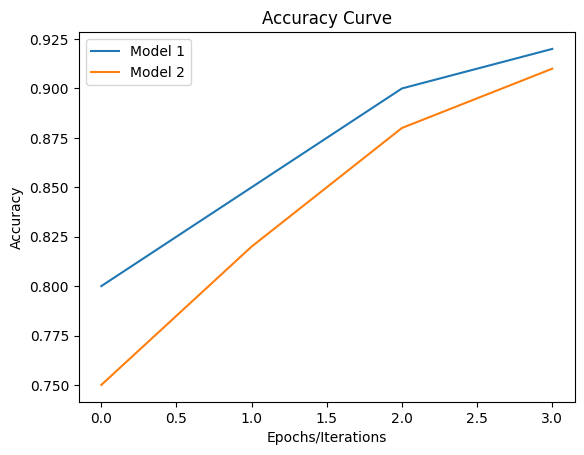

In [196]:
import matplotlib.pyplot as plt

# Assuming you have lists of accuracy values for different models or settings
# Example:
accuracy_model1 = [0.8, 0.85, 0.9, 0.92]
accuracy_model2 = [0.75, 0.82, 0.88, 0.91]

# Create the plot
plt.plot(accuracy_model1, label='Model 1')
plt.plot(accuracy_model2, label='Model 2')

# Add labels and title
plt.xlabel('Epochs/Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()